## Data Understanding
The data is obtained from Kaggle:[Twitter Sentiment Analysis](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)

In [4]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/301.4 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 503.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.5 MB 5.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.5 MB 3.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 4.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 4.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.5 MB 4.6 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.5 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 4.8 MB/s eta 0:00:01
   ------------

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']

df = pd.read_csv('twitter_training.csv', names=col_names)
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


The columns are:      
``ID``: Unique identifier for each entry  
``Entity``: Entity or brand mentioned in social media content  
``Sentiment``: Sentiment labels (e.g., Positive, Negative, Neutral)  
``Content``: Text content of social media posts

In [13]:
df.shape

(74682, 4)

The dataset consists of 74682 rows and 4 columns.

In [14]:
df.dtypes

ID            int64
Entity       object
Sentiment    object
Content      object
dtype: object

In [ ]:
#Data preprocessing

In [15]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

##### Dealing with the missing values

In [17]:
df.dropna(subset = ['Content'],inplace=True)

In [18]:
total_duplicates = df[df.duplicated(keep='first')].shape[0]

print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 2340


Drop the duplicated rows

In [19]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

replace irrelevant to neutral

In [20]:
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

## Exploratory Data Analysis

#### Sentiment distribution

In [21]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

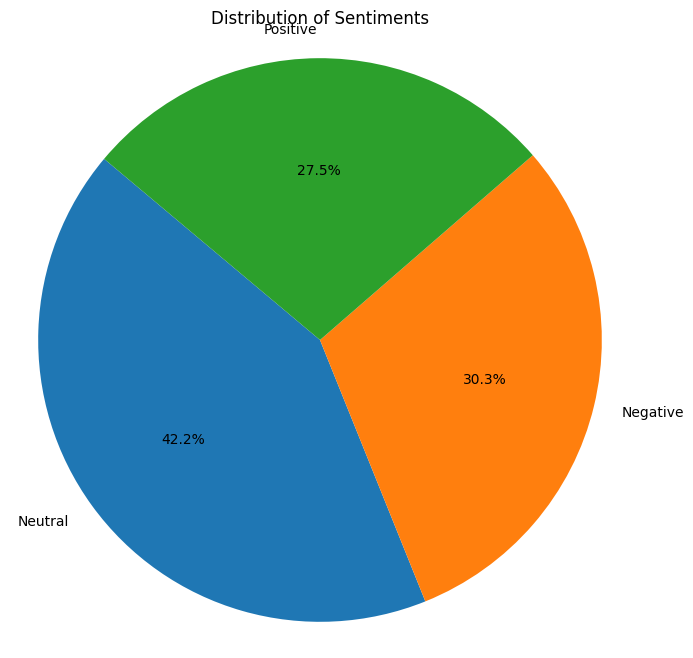

In [24]:
sentiment_distribution = df['Sentiment'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal') 
plt.show()

Sentiment Distribution Summary

- **Neutral Sentiment:** Approximately 42.2% of sentiments are neutral.
- **Negative Sentiment:** About 30.3% of sentiments are negative.
- **Positive Sentiment:** Around 27.5% of sentiments are positive.

The sentiment distribution is relatively balanced, with neutral sentiments being the most common. This analysis can guide actions such as engaging with neutral sentiments, addressing negative sentiments, and leveraging positive sentiments for marketing and brand promotion.


#### Distribution of Entity

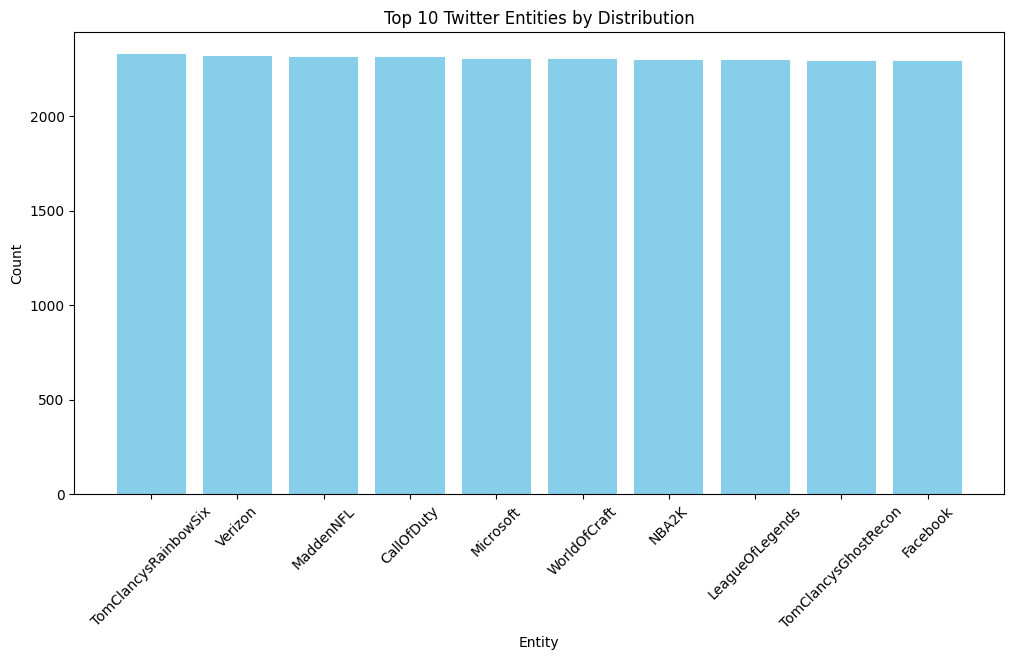

In [25]:
entity_distribution = df['Entity'].value_counts()

top_10_entities = entity_distribution.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_entities.index, top_10_entities.values, color='skyblue')
plt.title('Top 10 Twitter Entities by Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

#### Sentiment Distribution in Top 3 Entities

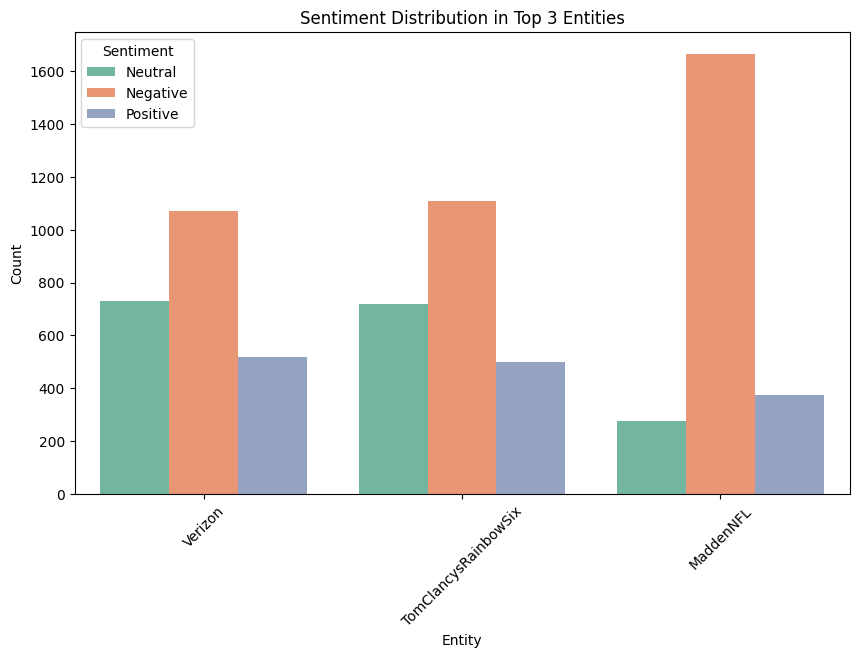

In [26]:
entity_distribution = df['Entity'].value_counts()

top_3_entities = entity_distribution.head(3).index

df_top_3 = df[df['Entity'].isin(top_3_entities)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_3, x='Entity', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

#### Sentiment Distribution Analysis

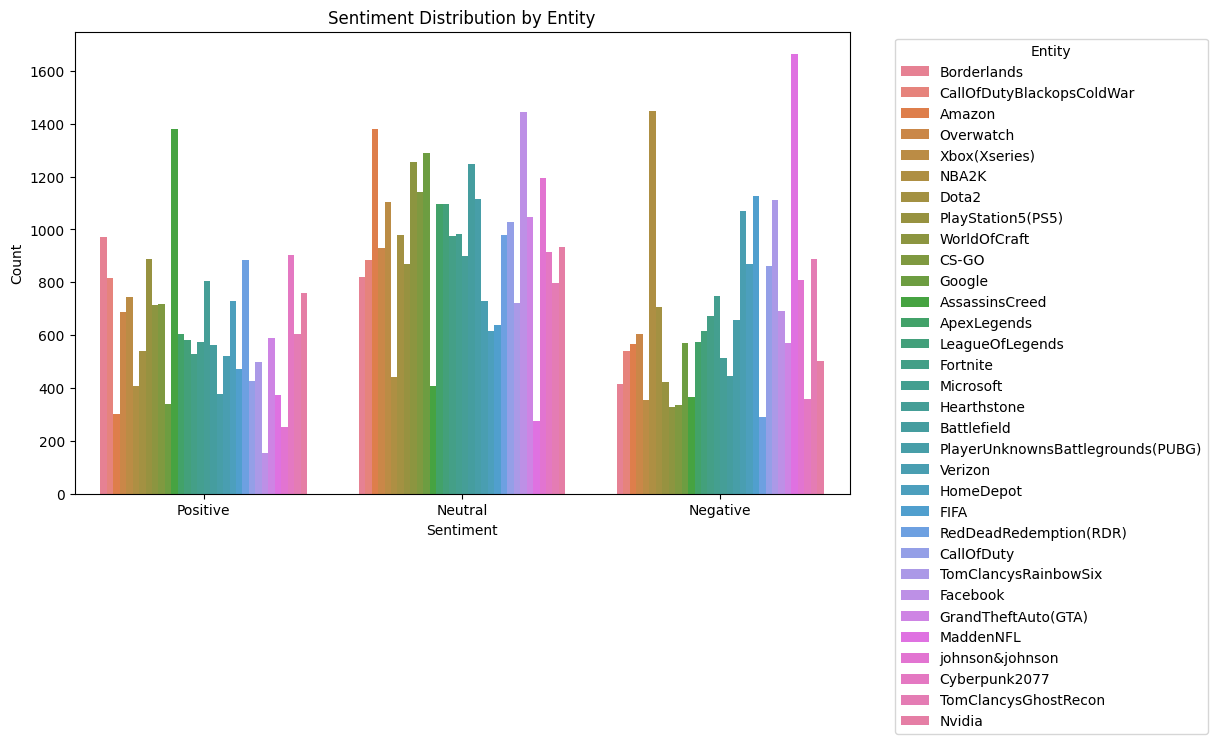

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Entity')
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
